## Duomenų analizė

In [87]:
# Importuojam bibliotekas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Elektriniai automobiliai, laisvai prieinami duomenys

In [88]:
# Nuskaitome paruoštą failą
df = pd.read_csv('data_ev.csv')
df

,MARKE,KOMERCINIS_PAV,ELEKTRINE_TP,APSKRITIS,PIRM_REG_METAI_LT
0,NISSAN,LEAF,Y,Kauno,2017-04
1,TESLA MOTORS,MODEL X,Y,Kauno,2017-05
2,NISSAN,LEAF,Y,Telšių,2017-09
3,NISSAN,NISSAN LEAF 40KWH,Y,Kauno,2018-11
4,NISSAN,LEAF,Y,Panevėžio,2019-06
...,...,...,...,...,...
13786,E-MAX,VT-120LD,Y,Kauno,2024-03
13787,MERCEDES-BENZ,EQC 400 4MATIC,Y,Kauno,2024-06
13788,MAZDA,MAZDA MX-30,Y,Kauno,2024-04
13789,MAZDA,MAZDA MX-30,Y,Vilniaus,2024-04


In [89]:
# Grupuojam pagal registravimo datą
df1 = df.groupby('PIRM_REG_METAI_LT').count()['MARKE']
df1

PIRM_REG_METAI_LT
2012-06      1
2013-12      2
2014-03      1
2014-04      1
2014-12      2
          ... 
2024-02    325
2024-03    370
2024-04    563
2024-05    507
2024-06    391
Name: MARKE, Length: 91, dtype: int64

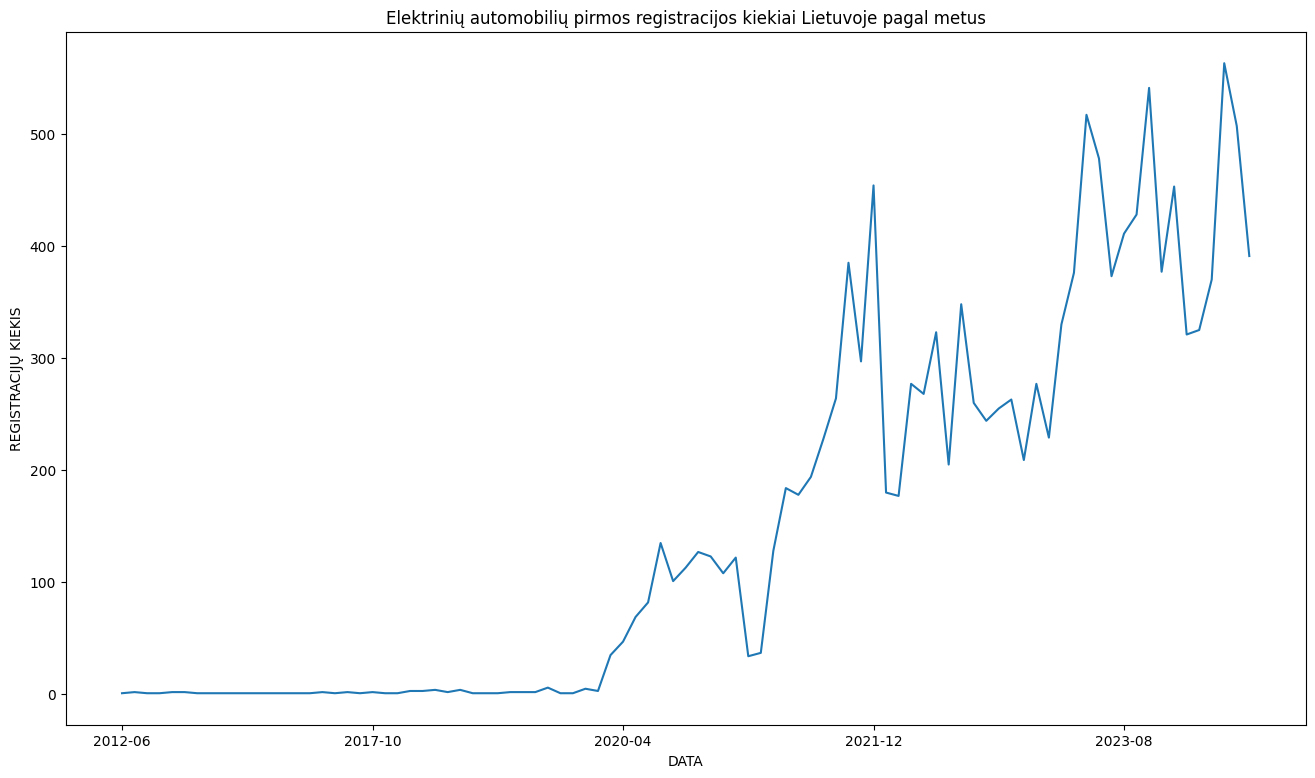

In [90]:
# Elektrinių automobilių pirmos registracijos kiekiai Lietuvoje pagal metus
df1.plot(figsize=(16, 9))
plt.xlabel('DATA')
plt.ylabel('REGISTRACIJŲ KIEKIS')
plt.title('Elektrinių automobilių pirmos registracijos kiekiai Lietuvoje pagal metus')
plt.show()

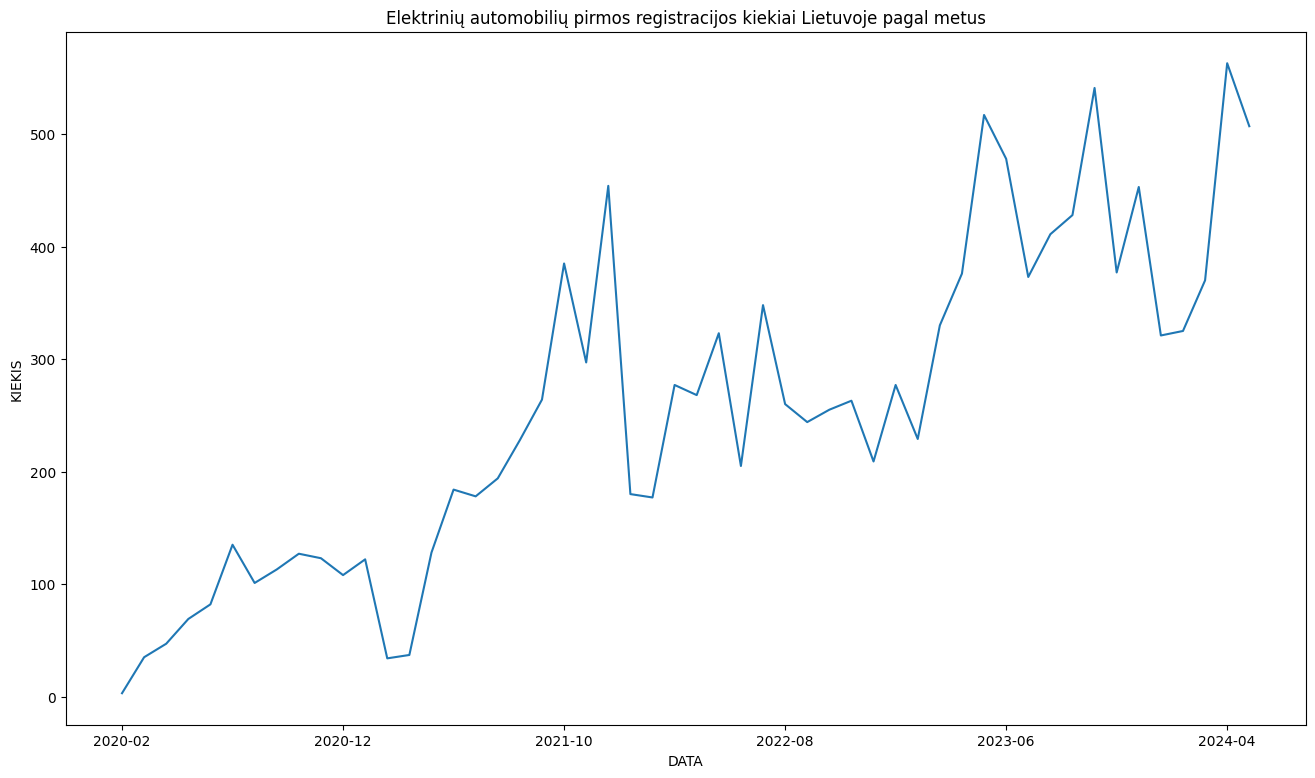

In [91]:
# Elektrinių automobilių pirmos registracijos kiekiai Lietuvoje pagal metus, pakeistas grafiko pradžios taškas
df1.loc['2020-02': '2024-05'].plot(y='Kiekis', figsize=(16, 9))
plt.xlabel('DATA')
plt.ylabel('KIEKIS')
plt.title('Elektrinių automobilių pirmos registracijos kiekiai Lietuvoje pagal metus')
plt.show()

In [92]:
# Patobulinam dataframe, neitraukiant netinkamus duomenis
df1 = df1.loc['2020-03': '2024-05']
df1

PIRM_REG_METAI_LT
2020-03     35
2020-04     47
2020-05     69
2020-06     82
2020-07    135
2020-08    101
2020-09    113
2020-10    127
2020-11    123
2020-12    108
2021-01    122
2021-02     34
2021-03     37
2021-04    128
2021-05    184
2021-06    178
2021-07    194
2021-08    228
2021-09    264
2021-10    385
2021-11    297
2021-12    454
2022-01    180
2022-02    177
2022-03    277
2022-04    268
2022-05    323
2022-06    205
2022-07    348
2022-08    260
2022-09    244
2022-10    255
2022-11    263
2022-12    209
2023-01    277
2023-02    229
2023-03    330
2023-04    376
2023-05    517
2023-06    478
2023-07    373
2023-08    411
2023-09    428
2023-10    541
2023-11    377
2023-12    453
2024-01    321
2024-02    325
2024-03    370
2024-04    563
2024-05    507
Name: MARKE, dtype: int64

In [93]:
# Indeksuojame
df1 = df1.reset_index()

# Įrašome naują failą su išvalytais duomenimis
df1.to_csv('data_ev_clean.csv', index=False)


## Apžvelkime statistinius duomenis

In [94]:
# Grupuojame registracijų skaičių pagal apskritis
df2 = df.groupby('APSKRITIS').count()['ELEKTRINE_TP'].sort_values(ascending=False)
df2

APSKRITIS
Vilniaus        6933
Kauno           3071
Klaipėdos       1557
Šiaulių          587
Panevėžio        479
Alytaus          298
Telšių           257
Utenos           209
Marijampolės     200
Tauragės         200
Name: ELEKTRINE_TP, dtype: int64

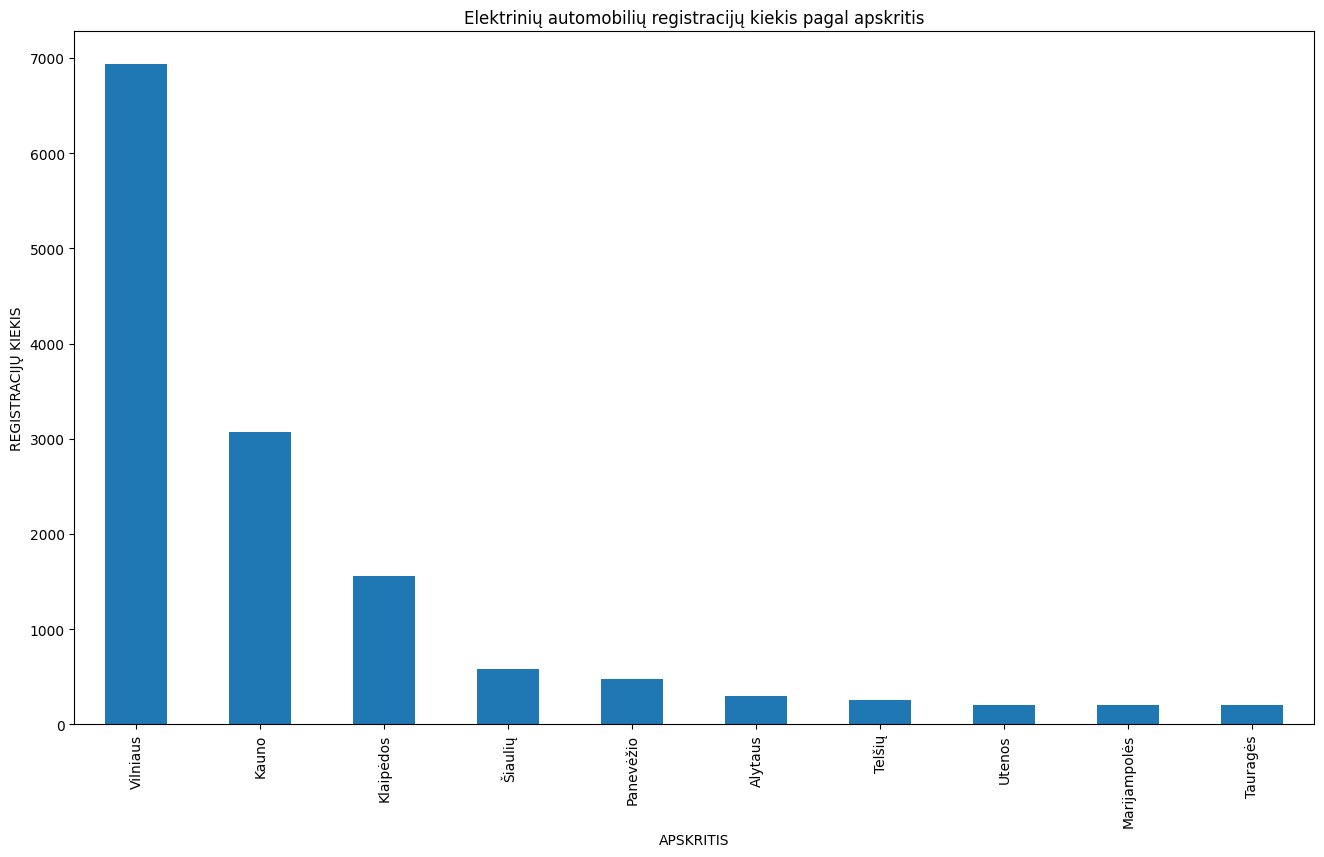

In [95]:
# Grafikas. Elektrinių automobilių registracijų kiekis pagal apskritis, Lietuva
df2.plot(kind='bar', figsize=(16, 9))
plt.xlabel('APSKRITIS')
plt.ylabel('REGISTRACIJŲ KIEKIS')
plt.title('Elektrinių automobilių registracijų kiekis pagal apskritis')
plt.show()

In [96]:
# Grupuojame registracijų skaičių pagal automobilio gamintoją (firma)
df12 = df.groupby('MARKE').count()['ELEKTRINE_TP'].sort_values(ascending=False).head(20)
df12

MARKE
TESLA             2208
VOLKSWAGEN. VW    1765
NISSAN            1411
HYUNDAI            802
AUDI               548
PEUGEOT            500
KIA                474
MERCEDES-BENZ      461
SKODA              397
BMW                377
RENAULT            342
BMW i              256
DACIA              247
VOLVO              244
TOYOTA             210
FORD               208
PORSCHE            203
SUNRA              187
CITROEN            183
VOLKSWAGEN         181
Name: ELEKTRINE_TP, dtype: int64

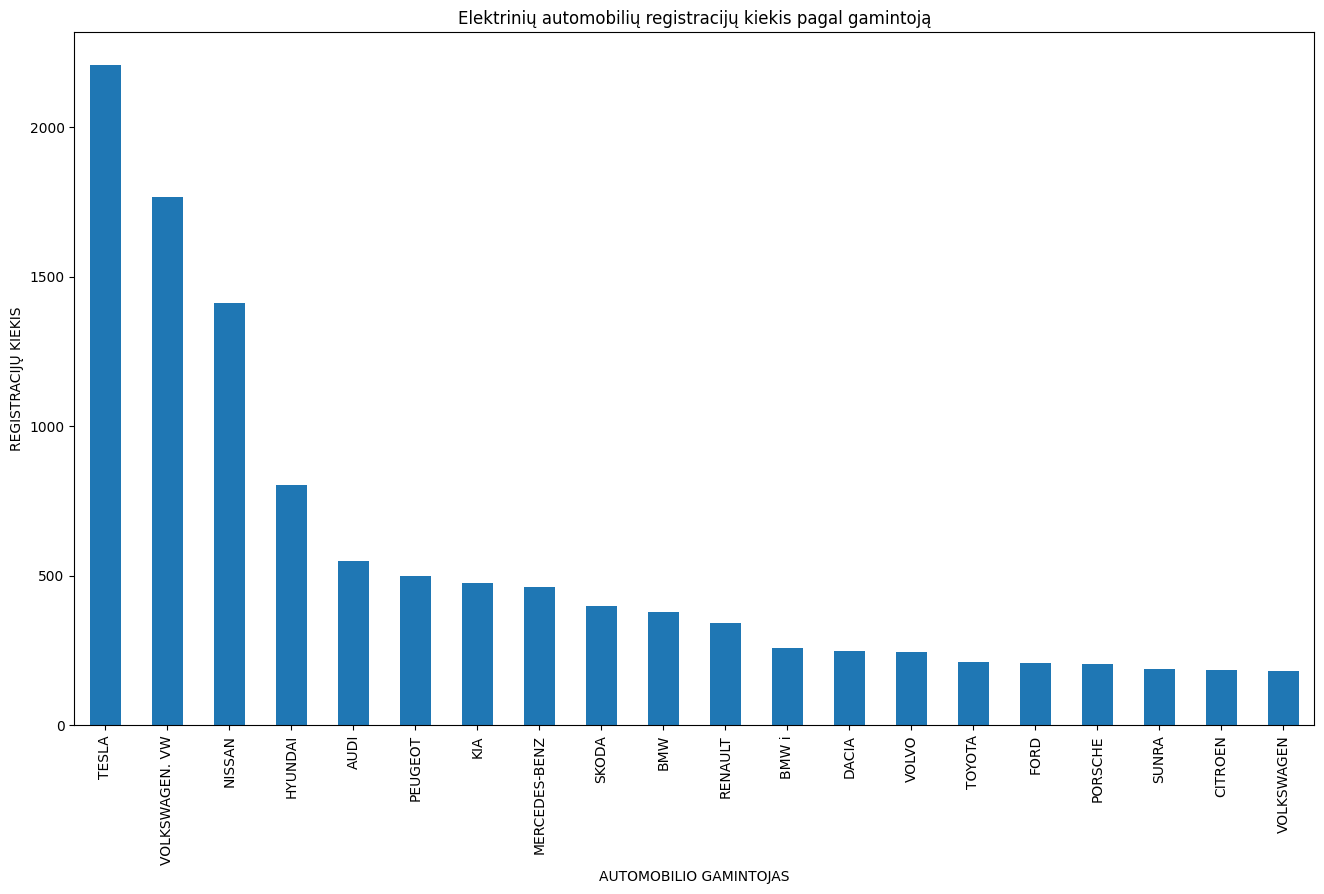

In [97]:
# Grafikas.  registracijų skaičius pagal automobilio modelį
df12.plot(kind='bar', figsize=(16, 9))
plt.xlabel('AUTOMOBILIO GAMINTOJAS')
plt.ylabel('REGISTRACIJŲ KIEKIS')
plt.title('Elektrinių automobilių registracijų kiekis pagal gamintoją')
plt.show()

In [98]:
# Grupuojame registracijų skaičių pagal automobilio modelio populiarumą
df2 = df.groupby('KOMERCINIS_PAV').count()['ELEKTRINE_TP'].sort_values(ascending=False).head(20)
df2

KOMERCINIS_PAV
MODEL 3              892
MODEL Y              734
NISSAN LEAF 40KWH    566
UP!                  431
ID.4 PRO 150 KW      374
MODEL S              319
ID.3 PRO 150 KW      298
ZOE                  273
KONA. KAUAI          272
2008                 251
SPRING               247
GOLF                 243
NIRO                 240
IONIQ                201
MUSTANG MACH-E       183
ENYAQ 60             171
i3                   171
NISSAN LEAF 62KWH    166
IONIQ5               164
208                  156
Name: ELEKTRINE_TP, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

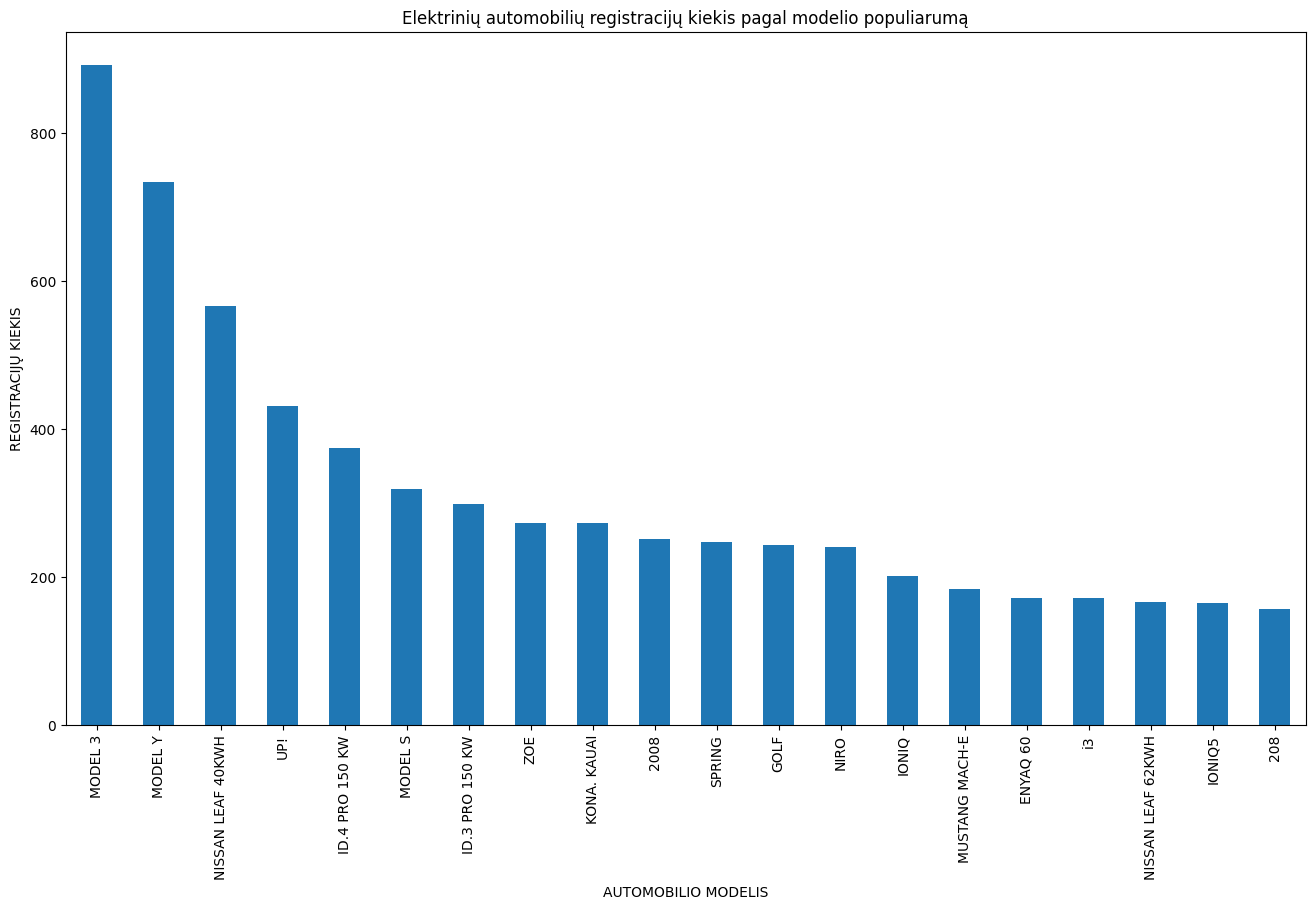

In [99]:
# Grafikas.  registracijų skaičius pagal automobilio modelį
df2.plot(kind='bar', figsize=(16, 9))
plt.xlabel('AUTOMOBILIO MODELIS')
plt.ylabel('REGISTRACIJŲ KIEKIS')
plt.title('Elektrinių automobilių registracijų kiekis pagal modelio populiarumą')
plt.show